- [Scipy Optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)          
- [Gamma Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma)       
- [Scipy Optimize Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)        
- [Scipy Stats Reference](https://docs.scipy.org/doc/scipy/reference/stats.html)          
- [Gamma Distribution Wikipedia](https://en.wikipedia.org/wiki/Gamma_distribution)         
- [scipy fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)      
- [scipy optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)    
- [scipy.optimize.minimize_scalar](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar)     
- [scipy.optimize.fmin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html)     
- [scipy.optimize.root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root)    
- [scipy.optimize.fixed_point](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)     


In [115]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import special
from scipy.optimize import minimize_scalar, fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
import itertools

HPD    = .95
SHAPE  = 3
RATE_  = 1 / 5
SCALE_ = None
SCALE  = (1 / RATE_) if SCALE_ is None else SCALE_

# rvs(a, loc=0, scale=1)


def _gamma(alpha, theta):
    """Gamma distribution closure."""
    # mode_ = (alpha - 1) * theta
    def _pdf(x):
        """Evaluate pdf at x."""
        return((np.power(x, alpha - 1) * np.exp(-x / theta)) / (special.gamma(alpha) * np.power(theta, alpha)))
    return(_pdf)



def _intersect(f1, f2, xinit):
    """
    Find points of intersection for f1 and f2.
    """
    return(fsolve(lambda x: f1(x) - f2(x), xinit))


In [116]:
pdf_ = _gamma(SHAPE, SCALE)
rv = stats.gamma(a=SHAPE, scale=SCALE)
print("Distribution mode  : {}".format((SHAPE - 1) * SCALE))
print("Distribution median: {}".format(rv.median()))
print("Distribution mean  : {}".format(rv.mean()))


Distribution mode  : 10.0
Distribution median: 13.370301568617794
Distribution mean  : 15.0


In [133]:
alpha  = SHAPE
theta  = SCALE

# Initialize distribution with specified parameters. 
rv       = stats.gamma(a=alpha, scale=theta)
rv_mode  = (alpha - 1) * theta
rv_max_i = rv.pdf(rv_mode)
rv_max   = rv_max_i
rv_min   = 0

# Variables targeted for update at each iteration.
x0      = [rv.ppf(.05), rv.ppf(.95)]
rv_mid  = (rv_max + rv_min) / 2.
f1      = _gamma(alpha=alpha, theta=theta)
f2      = lambda x: rv_mid
roots_  = _intersect(f1=f1, f2=f2, xinit=x0)
auc     = rv.cdf(roots_[-1]) - rv.cdf(roots_[0])


for i in itertools.count(start=1):
    
    if i>1000:
        print("Iteration failed to converge after 1000 cycles - exiting.")
        break
    
    print("[#{}]: rv_mid: {:.10f} - auc: {:.10f}".format(i, rv_mid, auc))
    
    if np.abs(auc - HPD) < 1e-10: 
        break
    
    # Get intersection points of horizontal line with distribution. 
    if auc<HPD:
        rv_max, rv_min = rv_mid, rv_min
    elif auc>HPD:
        rv_max, rv_min = rv_max, rv_mid
        
    rv_mid = (rv_max + rv_min) / 2.
    x0     = roots_
    roots_ = _intersect(f1=f1, f2=f2, xinit=x0)
    auc    = rv.cdf(roots_[-1]) - rv.cdf(roots_[0])


[#1]: rv_mid: 0.0270670566 - auc: 0.7418517600
[#2]: rv_mid: 0.0135335283 - auc: 0.8905514501
[#3]: rv_mid: 0.0067667642 - auc: 0.9502714983
[#4]: rv_mid: 0.0101501462 - auc: 0.9215301090
[#5]: rv_mid: 0.0084584552 - auc: 0.9361819216
[#6]: rv_mid: 0.0076126097 - auc: 0.9432977217
[#7]: rv_mid: 0.0071896869 - auc: 0.9468025002
[#8]: rv_mid: 0.0069782255 - auc: 0.9485414923
[#9]: rv_mid: 0.0068724949 - auc: 0.9494076214
[#10]: rv_mid: 0.0068196295 - auc: 0.9498398417
[#11]: rv_mid: 0.0067931968 - auc: 0.9500557405
[#12]: rv_mid: 0.0068064132 - auc: 0.9499478088
[#13]: rv_mid: 0.0067998050 - auc: 0.9500017790
[#14]: rv_mid: 0.0068031091 - auc: 0.9499747950
[#15]: rv_mid: 0.0068014570 - auc: 0.9499882873
[#16]: rv_mid: 0.0068006310 - auc: 0.9499950332
[#17]: rv_mid: 0.0068002180 - auc: 0.9499984062
[#18]: rv_mid: 0.0068000115 - auc: 0.9500000926
[#19]: rv_mid: 0.0068001148 - auc: 0.9499992494
[#20]: rv_mid: 0.0068000631 - auc: 0.9499996710
[#21]: rv_mid: 0.0068000373 - auc: 0.9499998818
[

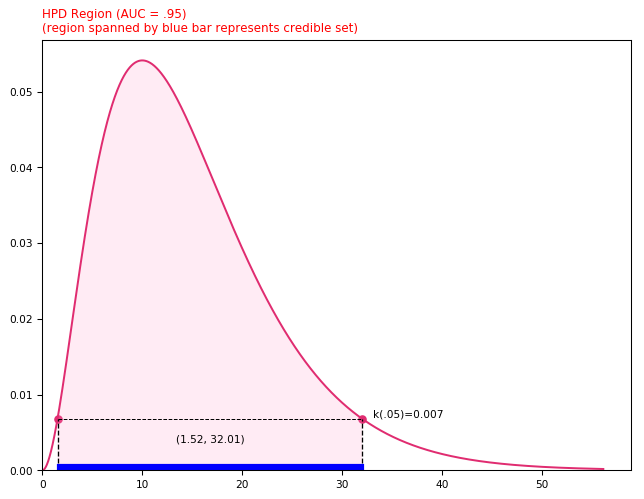

In [174]:
"""
Visualize distribution of PRIDIT scores. Exhibit is a histogram
with binwidth determined using a modified Freedman-Diaconis rule.
"""
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["text.usetex"] = False


COLOR = "#E02C70"

# rv = stats.gamma(a=alpha, scale=theta)
# pdf_ = _gamma(alpha=alpha, theta=theta)
# vpdf = np.vectorize(pdf_)

x = np.arange(0, rv.ppf(.999), .01, dtype=np.float32)
y = rv.pdf(x)

titlestr1 = "HPD Region (AUC = .95)"
titlestr2 = "(region spanned by blue bar represents credible set)"

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=95) 

ax.plot(x, y, color=COLOR)
ax.scatter(roots_[0], rv_mid, s=30, color=COLOR)
ax.scatter(roots_[-1], rv_mid, s=30, color=COLOR)

ax.plot([roots_[0], roots_[0]], [0, rv_mid], linestyle="--", linewidth=1.0, color="#000000")
ax.plot([roots_[-1], roots_[-1]], [0, rv_mid], linestyle="--", linewidth=1.0, color="#000000")
ax.plot([roots_[0], roots_[-1]], [rv_mid, rv_mid], linestyle="--", linewidth=.75, color="#000000")
ax.plot([roots_[0]+.5, roots_[-1]-.5], [0, 0], linestyle="-", linewidth=10, color="blue")
ax.set_ylim(bottom=0)
ax.set_xlim(0)
ax.fill_between(x, y, where=np.logical_and(x<=roots_[-1], x>=roots_[0]), facecolor="#ff9ccb", alpha=0.20)

ax.set_title(titlestr1 + "\n" + titlestr2, color="red", loc="left", fontsize=9)
ax.tick_params(axis="x", which="major", labelsize=8)
ax.tick_params(axis="x", which="minor", labelsize=8)
ax.tick_params(axis="y", which="major", labelsize=8)
ax.tick_params(axis="y", which="minor", labelsize=8)
ax.grid(False)

ax.annotate(
    "k(.05)={:.3f}".format(rv_mid), (roots_[-1], rv_mid), xytext=(35, 0), 
    textcoords="offset points", ha="center", va="bottom", fontsize=8, 
    rotation=0, color="#000000"
    )

ax.annotate(
    "({:.2f}, {:.2f})".format(roots_[0], roots_[-1]), 
    ((roots_[0] + roots_[-1]) / 2., rv_mid / 2.), xytext=(0, 0), 
    textcoords="offset points", ha="center", va="bottom", 
    fontsize=8, rotation=0, color="#000000"
    )

plt.show()


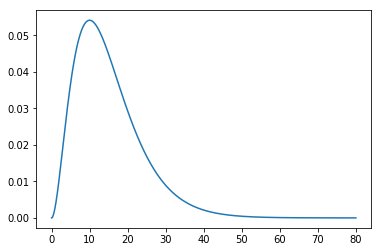

In [78]:
rv.cdf(100)
# pdf_(10)

vpdf = np.vectorize(pdf_)

x = np.arange(0, 80, .01, dtype=np.float32)
y = vpdf(x) 
y1 = rv.pdf(x)

plt.plot(x, y1)
plt.show()

For shape parameter $\alpha$ and rate parameter $\beta = 1 / \theta{}$:     


$$
f(x; \alpha, \beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha - 1}e^{-x\beta}
$$

<br>


- The mode of the gamma distribution is $\frac{\alpha - 1}{\beta{}}$.      
<br>
- The mean of the gamma distribution is $\frac{\alpha}{\beta{}}$.       
<br>
- The variance of the gamma distribution is $\frac{\alpha}{\beta{}^{2}}$.     
<br>
- The skewness of the gamma distribution is $\frac{2}{\sqrt{\alpha}}$.        
<br>
- The kurtosis of the gamma distribution is $\frac{6}{\alpha}$.      
<br>
- The coefficient of variation of the gamma distribution is $\frac{\sigma}{\mu} = \frac{1}{\sqrt{a}}$.    


In [14]:
rv_mode = (SHAPE - 1) / RATE_
rv_mode

0.4